In [1]:
# imports
import requests, re, nltk
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator
import numpy as np
import pylab
import matplotlib.pyplot as plt

In [2]:
# globals
stop_words = nltk.corpus.stopwords.words('english') + [
 'ut', '\'re','.', ',', '--', '\'s', '?', ')', '(', ':', '\'',
 '\"', '-', '}', '{', '&', '|', u'\u2014' ]

In [3]:
# plotting
%matplotlib inline
def plotTwoLists (wf_ee, wf_bu, title):
    f = plt.figure (figsize=(10, 6))
    f .suptitle (title, fontsize=20)
    ax = f.add_subplot(111)
    ax .spines ['top'] .set_color ('none')
    ax .spines ['bottom'] .set_color ('none')
    ax .spines ['left'] .set_color ('none')
    ax .spines ['right'] .set_color ('none')
    ax .tick_params (labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

    # Create two subplots, this is the first one
    ax1 = f .add_subplot (121)
    plt .subplots_adjust (wspace=.5)

    pos = np .arange (len(wf_ee)) 
    ax1 .tick_params (axis='both', which='major', labelsize=14)
    pylab .yticks (pos, [ x [0] for x in wf_ee ])
    ax1 .barh (range(len(wf_ee)), [ x [1] for x in wf_ee ], align='center')

    ax2 = f .add_subplot (122)
    ax2 .tick_params (axis='both', which='major', labelsize=14)
    pos = np .arange (len(wf_bu)) 
    pylab .yticks (pos, [ x [0] for x in wf_bu ])
    ax2 .barh (range (len(wf_bu)), [ x [1] for x in wf_bu ], align='center')

In [4]:
# Remove html markup
def cleanHtml (html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()

In [5]:
# define a function to get text/clean/calculate frequency
def get_wf (URL):
    # first get the web page
    r = requests .get(URL)
    
    # Now clean
    # remove html markup
    t = cleanHtml (r .text) .lower()
    
    # split string into an array of words using any sequence of spaces "\s+" 
    wds = re .split('\s+',t)
    
    # remove periods, commas, etc stuck to the edges of words
    for i in range(len(wds)): wds[i] = re.sub('[^a-zA-Z]', "", wds[i])
    
    # Get rid of empty words
    wds = [i for i in wds if i != ""]
    
    # Get word frequency
    wf = Counter (wds)
    
    # Remove stop words from the dictionary wf
    for k in stop_words:
        wf. pop(k, None)
        
    #how many regular words in the document?
    tw = 0
    for w in wf:
       tw += wf[w] 
        
    
    # Get ordered list
    wfs = sorted (wf .items(), key = operator.itemgetter(1), reverse=True)

    #Reverse the list because barh plots items from the bottom
    return (wfs, tw)

In [6]:
def get_unique_lists(L1, L2):
    L1_keys = [i[0] for i in L1]
    L2_keys = [i[0] for i in L2]
    tmp = [i for i in L1]
    
    L1 = [i for i in L1 if i[0] not in L2_keys]
    L2 = [i for i in L2 if i[0] not in L1_keys]
    
    return L1, L2

In [7]:
# Now populate three lists    
(wf_ee, tw_ee) = get_wf('https://www.gutenberg.org/files/142/142-0.txt') # $30,000 Bequest
(wf_bu, tw_bu) = get_wf('https://www.gutenberg.org/files/61522/61522-0.txt') # $1,000,000 bank-note
(wf_cf, tw_cf) = get_wf('https://www.gutenberg.org/files/103/103-0.txt') # Around the World in Eighty Days

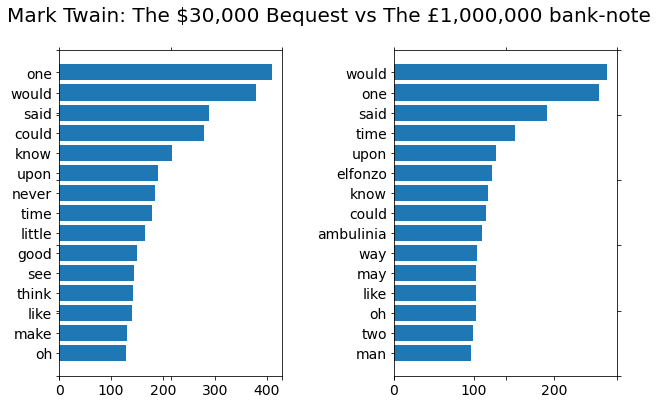

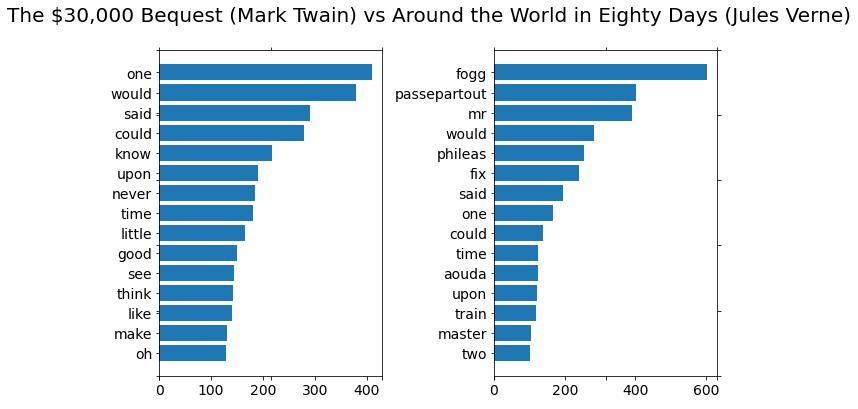

In [8]:
# Plot
plotTwoLists (wf_ee[:15][::-1], wf_bu[:15][::-1], 'Mark Twain: The $30,000 Bequest vs The £1,000,000 bank-note')
plotTwoLists (wf_ee[:15][::-1], wf_cf[:15][::-1], 'The $30,000 Bequest (Mark Twain) vs Around the World in Eighty Days (Jules Verne)')

In [17]:
def get_unique_count(L1, L2):
    L1_keys = [i[0] for i in L1]
    L2_keys = [i[0] for i in L2]
    same = 0
    
    for i in L1_keys:
      if i in L2_keys:
        same += 1
    
    return same

In [25]:
# Number of shared words in the top 15 words (same author)
Twain15 = get_unique_count(wf_ee[:15], wf_bu[:15])
print(f"Twain vs Twain (top 15): {Twain15}")

# Number of shared words in the top 1000 words (same author)
Twain = get_unique_count(wf_ee[:1000], wf_bu[:1000])
print(f"Twain vs Twain (top 1000): {Twain}")

# Number of shared words in the top 15 words (different author)
both15 = get_unique_count(wf_ee[:15], wf_cf[:15])
print(f"Twain vs Verne (top 15): {both15}")

# Number of shared words in the top 1000 words (different author)
both = get_unique_count(wf_ee[:1000], wf_cf[:1000])
print(f"Twain vs Verne (top 1000): {both}")

Twain vs Twain (top 15): 9
Twain vs Twain (top 1000): 714
Twain vs Verne (top 15): 6
Twain vs Verne (top 1000): 476


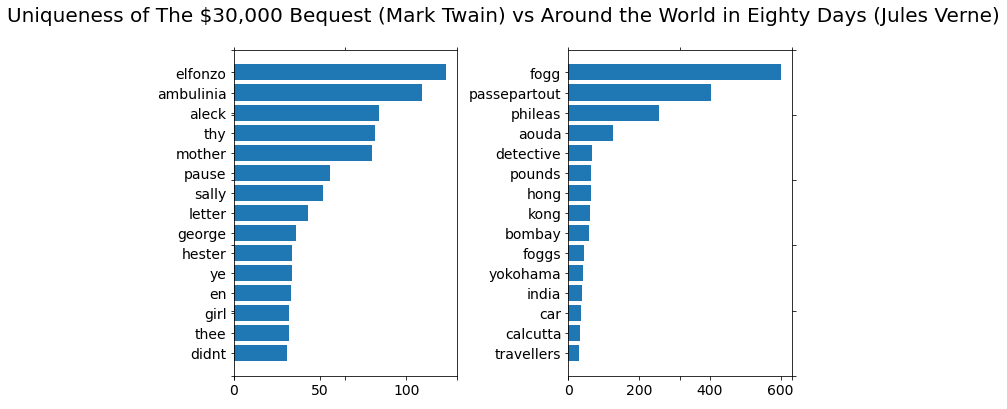

In [10]:
eeNew, cfNew = get_unique_lists(wf_ee, wf_cf)

plotTwoLists (eeNew[:15][::-1], cfNew[:15][::-1], 'Uniqueness of The $30,000 Bequest (Mark Twain) vs Around the World in Eighty Days (Jules Verne)')

In [11]:
print("The $30,000 Bequest")
print(f"Total number of words: {len(wf_ee)}")
print(f"Total number of unique words: {len(eeNew)}")
print(f"Percentage of unique words: {round(len(eeNew)/len(wf_ee),2)}")

print("\nAround the World in Eighty Days")
print(f"Total number of words: {len(wf_cf)}")
print(f"Total number of unique words: {len(cfNew)}")
print(f"Percentage of unique words: {round(len(cfNew)/len(wf_cf),2)}")

The $30,000 Bequest
Total number of words: 10659
Total number of unique words: 6801
Percentage of unique words: 0.64

Around the World in Eighty Days
Total number of words: 7244
Total number of unique words: 3386
Percentage of unique words: 0.47
